In [61]:
from PIL import Image, ImageSequence

import matplotlib.pyplot as plt

def plot_gif_frames_table(gif_paths, start_frame=9, end_frame=12, titles=None, skip_frames=1):
    gifs_frames = []

    # Extract frames from each GIF
    for gif_path in gif_paths:
        gif = Image.open(gif_path)
        frames = [frame.copy() for i, frame in enumerate(ImageSequence.Iterator(gif)) 
                  if start_frame <= i < end_frame and (i - start_frame) % skip_frames == 0]
        gifs_frames.append(frames)

    frames_to_extract = len(gifs_frames[0]) if gifs_frames else 0
    num_gifs = len(gif_paths)
    fig, axes = plt.subplots(frames_to_extract, num_gifs, figsize=(num_gifs * 3, frames_to_extract * 3))

    # Plot
    for col, frames in enumerate(gifs_frames):
        for row, frame in enumerate(frames):
            ax = axes[row, col] if frames_to_extract > 1 else axes[col]
            ax.imshow(frame)
            ax.axis('off')
            if titles and row == 0: 
                ax.set_title(titles[col])
            ax.text(0.5, -0.1, f"Frame {start_frame + row * skip_frames}", 
                    size=10, ha="center", transform=ax.transAxes)

    plt.tight_layout()
    plt.show()


def plot_gif_frames_table_horizontal(gif_paths, start_frame=9, end_frame=12, titles=None, skip_frames=1):
    gifs_frames = []

    # Extract frames from each GIF
    for gif_path in gif_paths:
        gif = Image.open(gif_path)
        frames = [frame.copy() for i, frame in enumerate(ImageSequence.Iterator(gif)) 
                  if start_frame <= i < end_frame and (i - start_frame) % skip_frames == 0]
        gifs_frames.append(frames)

    frames_to_extract = len(gifs_frames[0]) if gifs_frames else 0
    num_gifs = len(gif_paths)
    fig, axes = plt.subplots(num_gifs, frames_to_extract, figsize=(frames_to_extract * 3, num_gifs * 3))

    # Plot
    for row, frames in enumerate(gifs_frames):
        for col, frame in enumerate(frames):
            ax = axes[row, col] if num_gifs > 1 else axes[col]
            ax.imshow(frame)
            ax.axis('off')
            if titles and col == 0: 
                ax.set_title(titles[row])
            ax.text(0.5, -0.1, f"Frame {start_frame + col * skip_frames}", 
                    size=10, ha="center", transform=ax.transAxes)

    plt.tight_layout()
    plt.show()

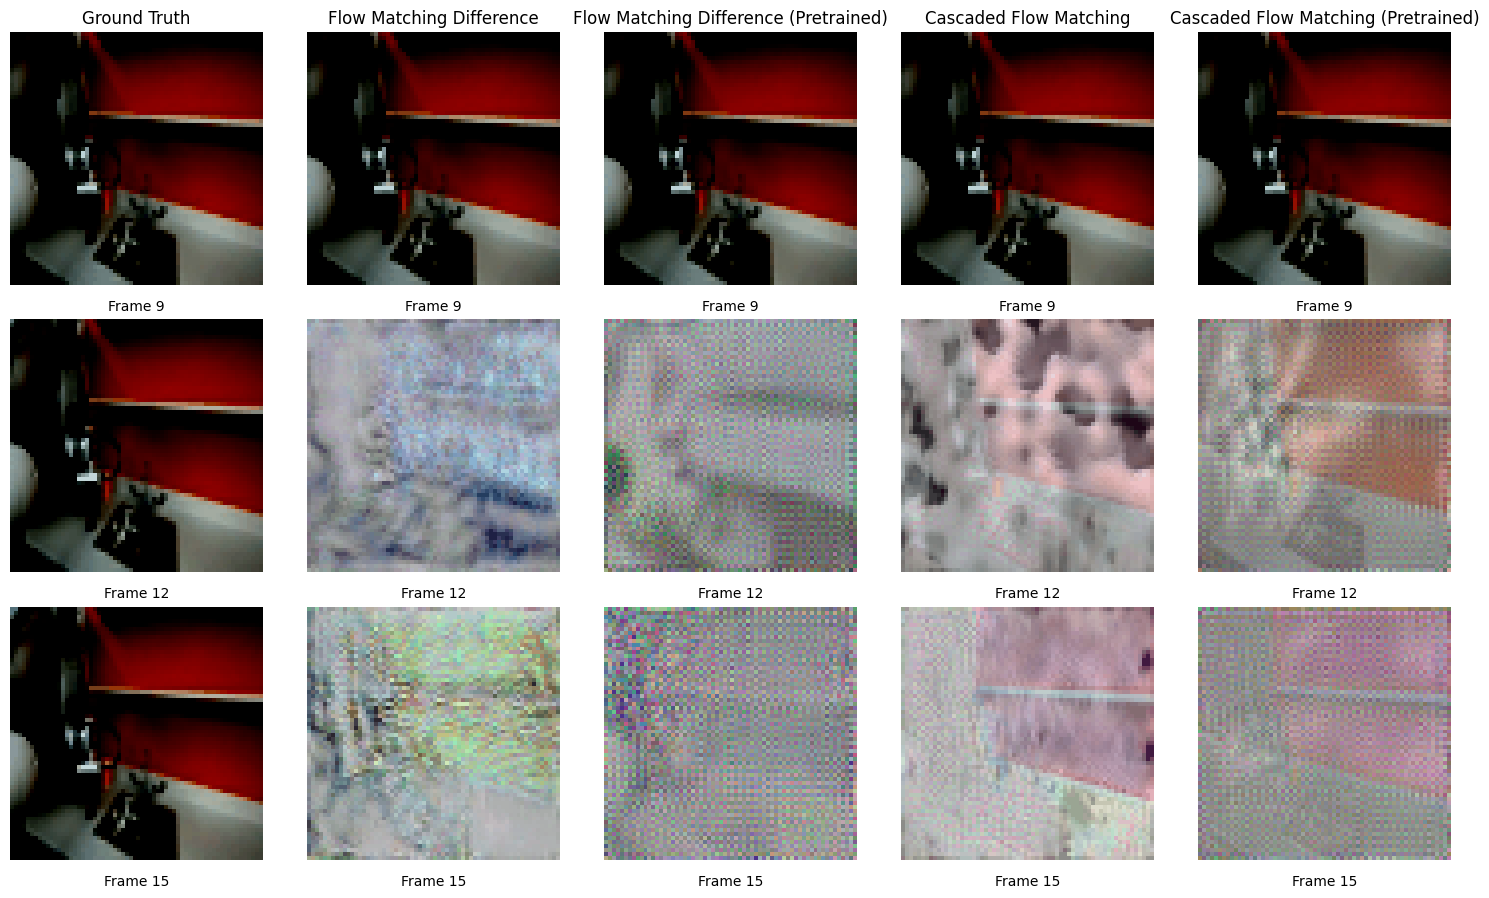

In [69]:
plot_gif_frames_table(
    ["./output_flow_matching_difference/ground_truth_1.gif", "./output_flow_matching_difference_actual/predicted_1.gif", "./output_flow_matching_difference/predicted_1.gif", "./output_cascade/predicted_1.gif", "./output_resnet_backbone_d256/predicted_1.gif"], 
    titles=["Ground Truth", "Flow Matching Difference", "Flow Matching Difference (Pretrained)", "Cascaded Flow Matching", "Cascaded Flow Matching (Pretrained)"], skip_frames=3, start_frame=9, end_frame=18)

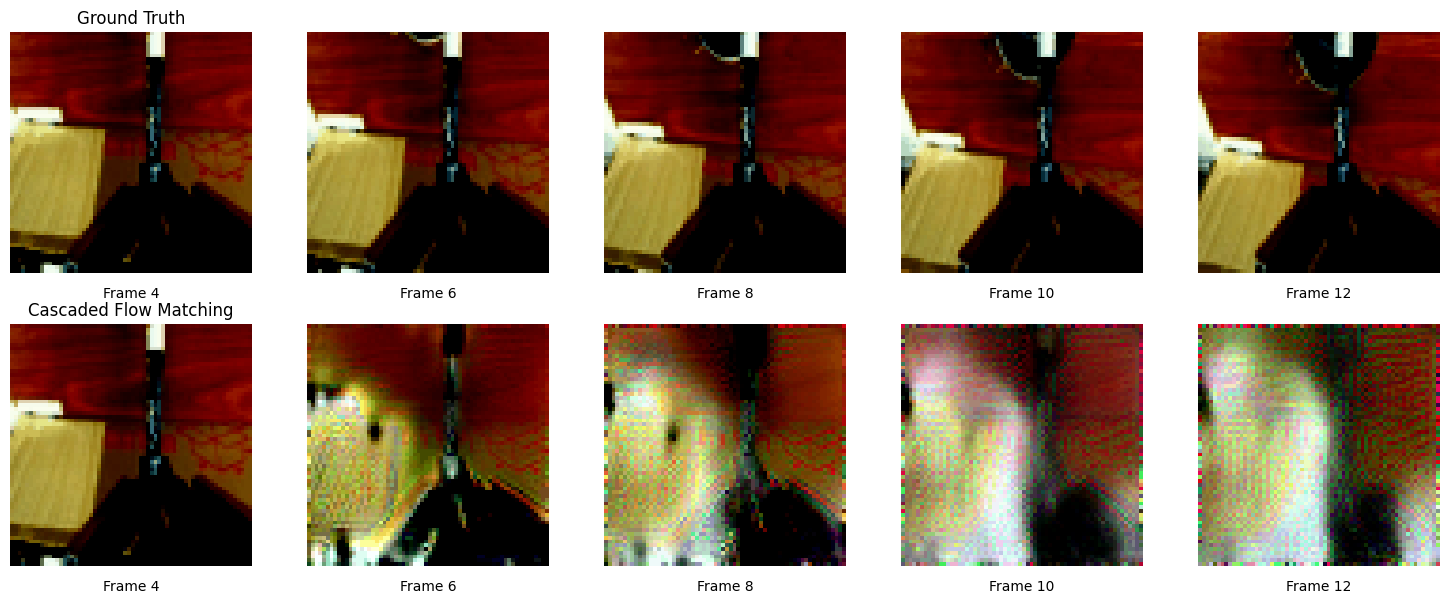

In [63]:
plot_gif_frames_table_horizontal(
    ["./output_d256_50epoch/ground_truth_100.gif", "./output_d256_50epoch/predicted_100.gif"], 
    titles=["Ground Truth", "Cascaded Flow Matching"], skip_frames=2, start_frame=4, end_frame=13)